In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
from citipy import citipy

In [15]:
# from API_practice ipynb file
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [17]:
# 6.2.6 Get the City Weather Data
import requests
# weather api key
from config import weather_api_key 

In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | balkanabat
Processing Record 8 of Set 1 | yar-sale
Processing Record 9 of Set 1 | marathon
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | paka
Processing Record 19 of Set 1 | atherton
Processing Record 20 of Set 1 | shar
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | ushuaia
Processi

Processing Record 39 of Set 4 | half moon bay
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | neuquen
Processing Record 42 of Set 4 | disna
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | awjilah
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | tlacotepec
Processing Record 48 of Set 4 | raudeberg
Processing Record 49 of Set 4 | marawi
Processing Record 50 of Set 4 | vestmannaeyjar
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | emba
Processing Record 3 of Set 5 | kapaa
Processing Record 4 of Set 5 | cascais
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | abu samrah
Processing Record 9 of Set 5 | liwale
Processing Record 10 of Set 5 | laguna
Processing Record 11 of Set 5 | samarai
Processing Record 12 of Set 5 | beringovskiy
Processing Reco

Processing Record 29 of Set 8 | hofn
Processing Record 30 of Set 8 | san angelo
Processing Record 31 of Set 8 | chimore
Processing Record 32 of Set 8 | natal
Processing Record 33 of Set 8 | danshui
Processing Record 34 of Set 8 | bilma
Processing Record 35 of Set 8 | bayan
Processing Record 36 of Set 8 | omboue
Processing Record 37 of Set 8 | sinjah
City not found. Skipping...
Processing Record 38 of Set 8 | yavaros
Processing Record 39 of Set 8 | constitucion
Processing Record 40 of Set 8 | talnakh
Processing Record 41 of Set 8 | pemangkat
Processing Record 42 of Set 8 | hervey bay
Processing Record 43 of Set 8 | sept-iles
Processing Record 44 of Set 8 | malwan
City not found. Skipping...
Processing Record 45 of Set 8 | hamilton
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | santa rosa
Processing Record 48 of Set 8 | nambucca heads
Processing Record 49 of Set 8 | puerto escondido
Processing Record 50 of Set 8 | asau
Processing Record 1 of Set 9 | zaysan
Proc

Processing Record 17 of Set 12 | paralimni
Processing Record 18 of Set 12 | victor harbor
Processing Record 19 of Set 12 | ihosy
Processing Record 20 of Set 12 | olafsvik
Processing Record 21 of Set 12 | vanimo
Processing Record 22 of Set 12 | eraniel
Processing Record 23 of Set 12 | tadine
Processing Record 24 of Set 12 | izumo
Processing Record 25 of Set 12 | corinto
Processing Record 26 of Set 12 | iralaya
Processing Record 27 of Set 12 | toliary
City not found. Skipping...
Processing Record 28 of Set 12 | batagay-alyta
Processing Record 29 of Set 12 | santa isabel do rio negro
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 12 | kondinskoye
Processing Record 32 of Set 12 | ginda
Processing Record 33 of Set 12 | port saint lucie
Processing Record 34 of Set 12 | xicotencatl
Processing Record 35 of Set 12 | peruibe
Processing Record 36 of Set 12 | chifeng
Processing Record 37 of Set 12 | severnyy
Processing Record 38 of Set 12 | miri

In [21]:
len(city_data)

585

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,70.81,63,0,11.27,ZA,2022-11-13 09:54:29
1,Ahipara,-35.1667,173.1667,57.43,89,9,7.78,NZ,2022-11-13 09:54:29
2,Hasaki,35.7333,140.8333,67.21,86,100,22.70,JP,2022-11-13 09:54:29
3,Tuktoyaktuk,69.4541,-133.0374,8.51,94,41,3.44,CA,2022-11-13 09:54:30
4,Cape Town,-33.9258,18.4232,76.12,55,40,8.01,ZA,2022-11-13 09:54:30
5,Rio Grande,-32.0350,-52.0986,68.49,87,100,16.55,BR,2022-11-13 09:51:47
6,Balkanabat,39.5108,54.3671,60.46,49,2,13.67,TM,2022-11-13 09:54:31
7,Yar-Sale,66.8333,70.8333,-1.34,91,97,10.47,RU,2022-11-13 09:54:31
8,Marathon,44.9000,-89.7668,22.71,84,100,9.22,US,2022-11-13 09:54:32
9,Atuona,-9.8000,-139.0333,77.81,81,23,20.47,PF,2022-11-13 09:54:32


In [24]:
# Change column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-11-13 09:54:29,-34.4187,19.2345,70.81,63,0,11.27
1,Ahipara,NZ,2022-11-13 09:54:29,-35.1667,173.1667,57.43,89,9,7.78
2,Hasaki,JP,2022-11-13 09:54:29,35.7333,140.8333,67.21,86,100,22.70
3,Tuktoyaktuk,CA,2022-11-13 09:54:30,69.4541,-133.0374,8.51,94,41,3.44
4,Cape Town,ZA,2022-11-13 09:54:30,-33.9258,18.4232,76.12,55,40,8.01
...,...,...,...,...,...,...,...,...,...
580,Dalvik,IS,2022-11-13 10:10:34,65.9702,-18.5286,36.70,82,75,11.95
581,Gayeri,BF,2022-11-13 10:10:34,12.6497,0.4931,91.51,20,15,13.44
582,Takaka,NZ,2022-11-13 10:10:35,-40.8500,172.8000,57.56,85,49,3.91
583,Meulaboh,ID,2022-11-13 10:10:35,4.1363,96.1285,74.79,95,100,2.24


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# 6.3.1 Plot Latitude vs Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1668337516.0681987

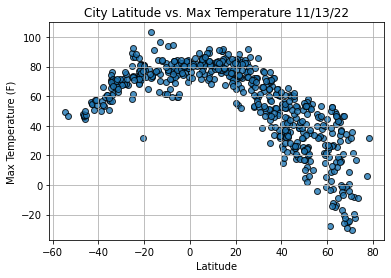

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

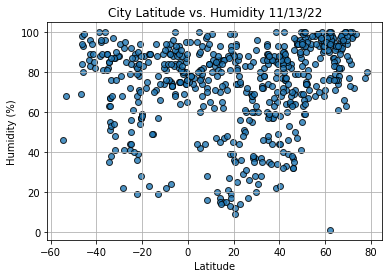

In [29]:
# 6.3.2 Plot Latitude vs Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

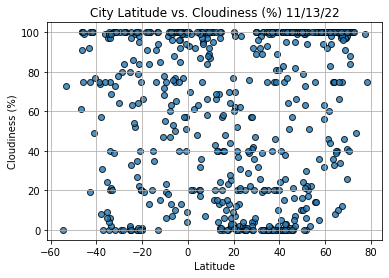

In [30]:
# 6.3.3 Plot Latitude vs Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

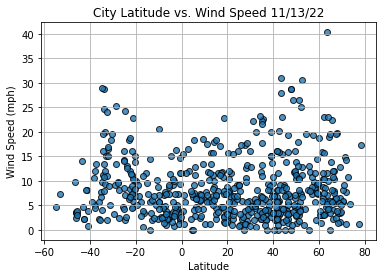

In [31]:
# 6.3.4 Plot Latitude vs Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()